In [1]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import numpy as np
import pandas as pd
import xarray as xr

from arke.cart import lcc_map, label_map

from common_defs import toponyms
from plot_utils import LCC_KW, trans
import mypaths

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('paperfig.mplstyle')

In [4]:
dset_name = 'era5'

In [5]:
sst_ds = xr.open_mfdataset(sorted(mypaths.era5_dir.glob('*sst.nc')))

In [6]:
ci_ds = xr.open_mfdataset(sorted(mypaths.era5_dir.glob('*ci.nc')))

In [7]:
gpt = xr.open_dataarray(mypaths.era5_dir / 'z.nc')

In [8]:
orog = (gpt / 9.80665).squeeze()

In [9]:
ave_sst = sst_ds.sst.mean(dim='time').compute()
ave_ci = ci_ds.ci.mean(dim='time').compute()

In [10]:
ave_sst = ave_sst.where(ave_sst>272.,  np.nan) - 271.35

In [11]:
orog = orog.where(orog > 0., 0)

In [12]:
LCC_KW['extent'] = [-20, 45, 65, 85]
LCC_KW['ticks'] = [10, 5]
LCC_KW['coast'] = None
LCC_KW['clon'] = 25

In [13]:
sst_cmap = plt.cm.viridis
# sst_cmap.set_under(color='gray', alpha=1.)
# sst_cmap.set_bad(color='gray', alpha=1.)

sst_kw = dict(cmap=sst_cmap, robust=False, levels=np.arange(0, 11, 1), infer_intervals=False, extend='max', add_labels=False, add_colorbar=False) #, cbar_kwargs=dict(pad=0.01))
ci_kw = dict(colors='C1', levels=[0.15])

orog_cmap = plt.cm.cubehelix
# orog_cmap.set_under(color='r', alpha=0.)
# orog_cmap.set_bad(color='r', alpha=0.)
orog_kw = dict(cmap=orog_cmap, levels=np.array([10] + [*range(200, 2100, 200)]), extend='both', cbar_kwargs=dict(pad=0.01), add_labels=False)

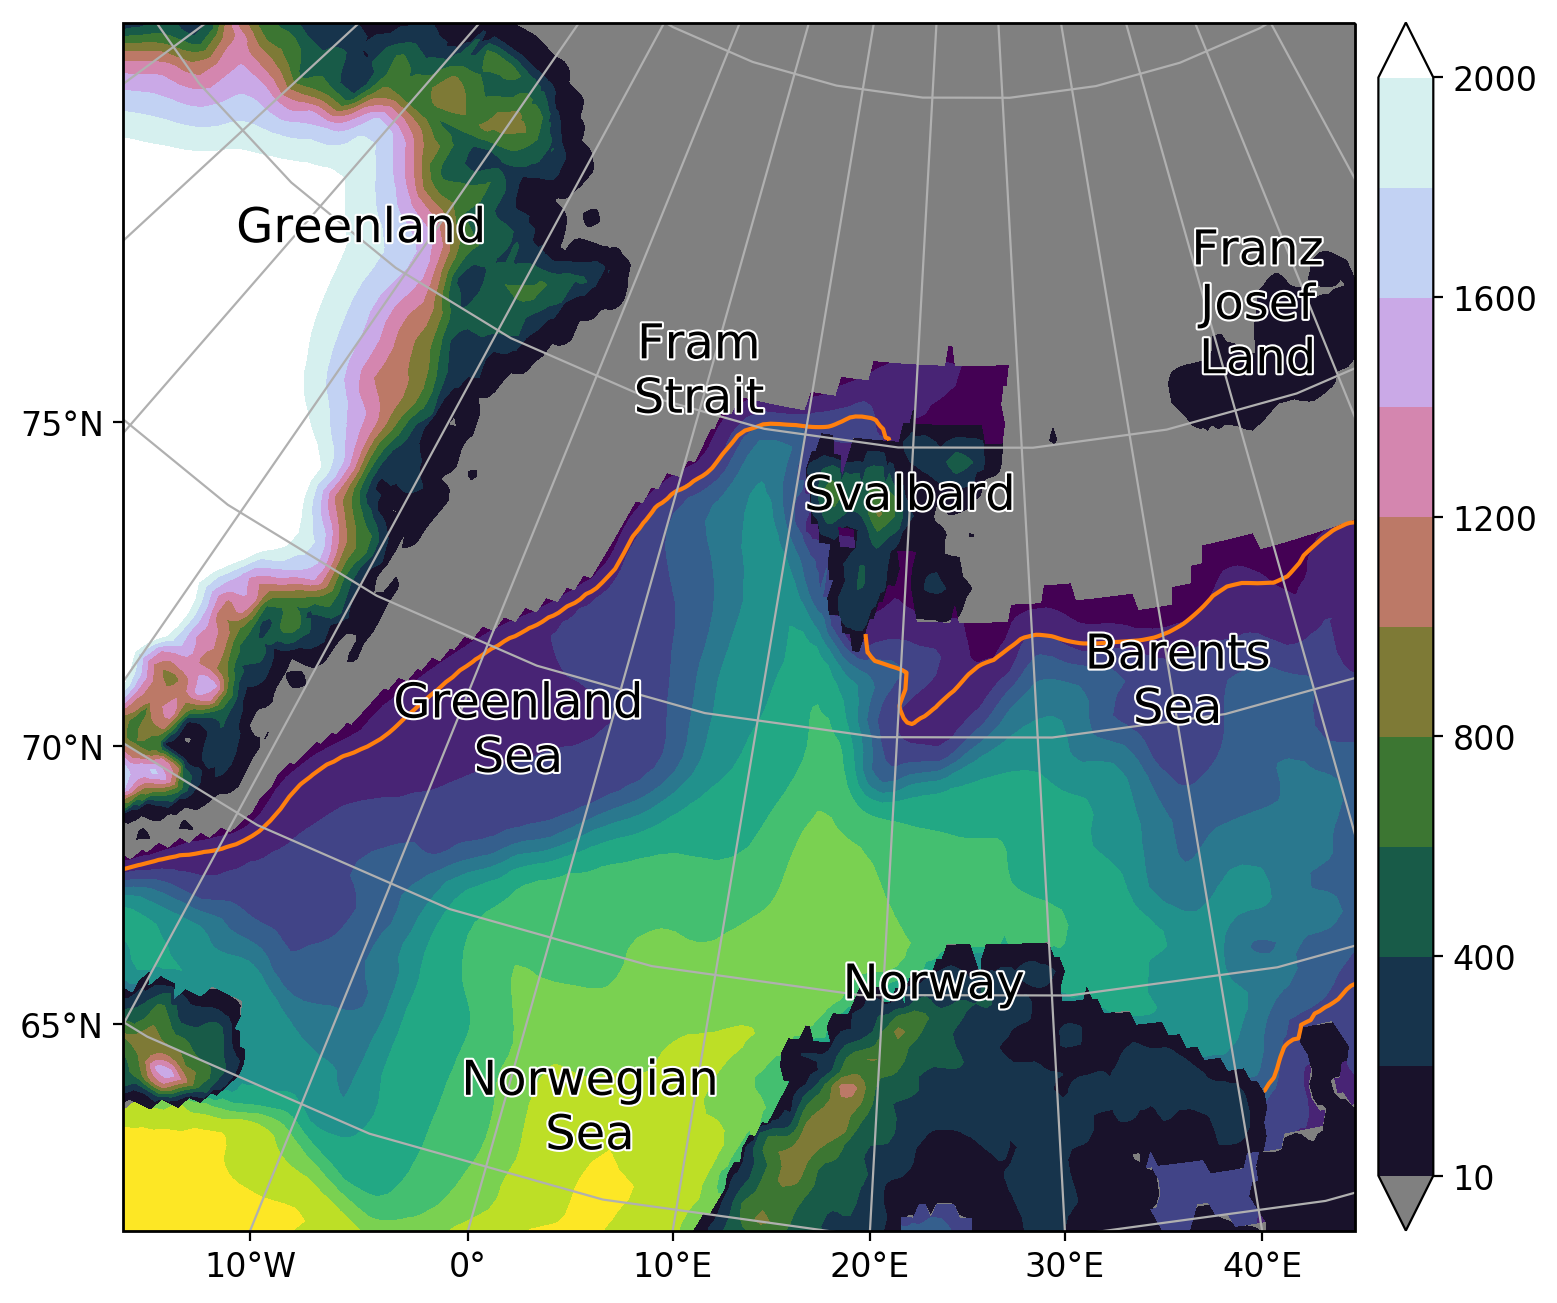

In [14]:
fig = plt.figure()

ax = lcc_map(fig, **LCC_KW)

cs = orog.plot.contourf(ax=ax, **orog_kw, **trans)
cs.cmap.set_under('gray')
cs.set_clim(10, 2100)

cs = ave_sst.plot.contourf(ax=ax, **sst_kw, **trans)
ave_ci.plot.contour(ax=ax, **ci_kw, **trans)

cs.cmap.set_under('gray')
cs.set_clim(0, 10)

label_map(ax, toponyms, **trans, fontsize='x-large', ha='center',
          path_effects=[PathEffects.withStroke(linewidth=1.5, foreground='w')])

ax.set_xlabel('')
ax.set_ylabel('');

In [15]:
fig.savefig(mypaths.plotdir / f'nordic_seas_sst_seaice')